In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset
df = pd.read_csv('/content/laptop.csv')

In [4]:
# first 5 rows of dataset
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# **Data Exploration and Understanding**

In [5]:
#returns the number of rows and columns of the dataset
df.shape

(1303, 13)

In [6]:
# returns the data types of the columns
df.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,float64
Company,object
TypeName,object
Inches,object
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object


In [7]:
#summary information about a Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


This DataFrame has 1303 rows and 13 columns, but only 1273 rows have complete (non-null) data for most columns.

In [8]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [9]:
#Replaces common placeholders for missing values ('?', 'N/A', 'null', 'NaN') with np.nan
df.replace(['?', 'N/A', 'null', 'NaN'], np.nan, inplace=True)

#Counts the number of missing (NaN) values in each column after replacement.
df.isnull().sum()


,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,31
ScreenResolution,30
Cpu,30
Ram,30
Memory,31
Gpu,30


This output shows that several columns have 30–31 missing values, indicating incomplete rows in the dataset.

In [10]:
#count the number of duplicate rows in the Dataset.
df.duplicated().sum()

np.int64(0)

There was no duplicate rows in the dataset

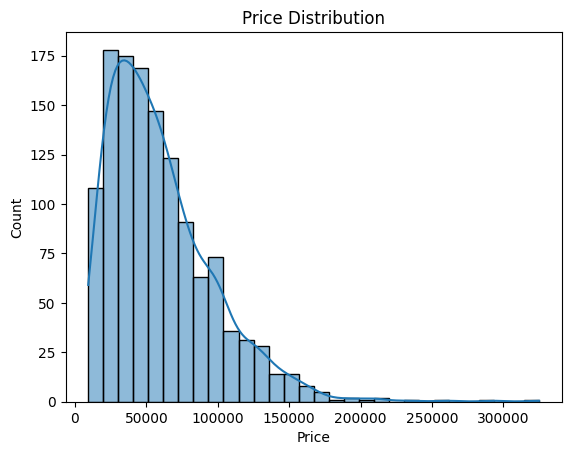

In [11]:
#visualize how laptop prices are spread out
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

The histogram shows that most laptop prices are concentrated between ₹20,000 and ₹80,000, with a peak around ₹40,000. The distribution is right-skewed, indicating fewer high-priced laptops in the dataset.

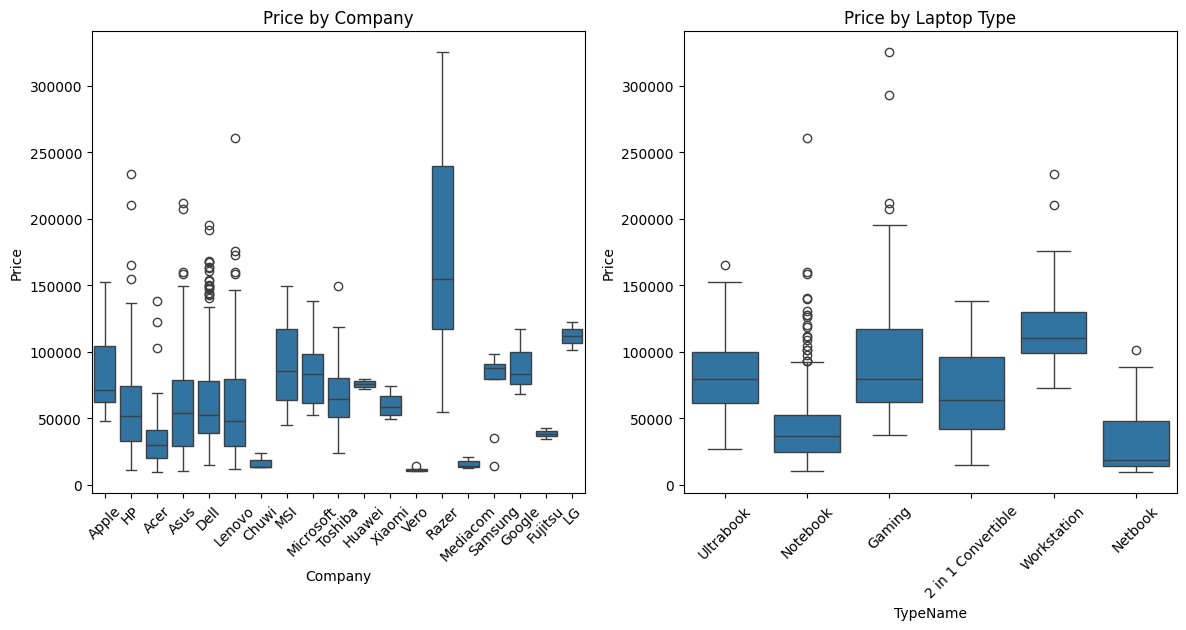

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Price by Company
sns.boxplot(x='Company', y='Price', data=df, ax=axes[0])
axes[0].set_title("Price by Company")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for Price by Laptop Type
sns.boxplot(x='TypeName', y='Price', data=df, ax=axes[1])
axes[1].set_title("Price by Laptop Type")
axes[1].tick_params(axis='x', rotation=45)

The boxplots show that Razer and Apple laptops tend to have the highest median prices, while Toshiba and Mediacom offer lower-cost options.
Among types, Workstations and Gaming laptops are generally more expensive, while Netbooks and Notebooks are on the lower end of the price spectrum.

# **Data Preprocessing**

In [13]:
# Drop unnecessary columns for dataset
df= df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [14]:
# Drop Null Values

df.dropna(inplace=True)

In [15]:
# Shape of the data after dropping the null values
df.shape

(1270, 11)

In [16]:
# Change Datatypes

df['Inches'] = df['Inches'].astype(float)

df['Ram(GB)'] = df['Ram'].str.replace('GB', '', regex=False).astype(int)

df['Weight(Kg)'] = df['Weight'].str.replace('kg','',regex=False).astype(float)

df.drop(columns = ['Ram','Weight'], inplace = True)

I cleaned and converted the Inches, Ram, and Weight columns into proper numeric formats so I can analyze them more easily.
After extracting the clean values, I removed the original Ram and Weight columns and kept the new ones: Ram(GB) and Weight(Kg).

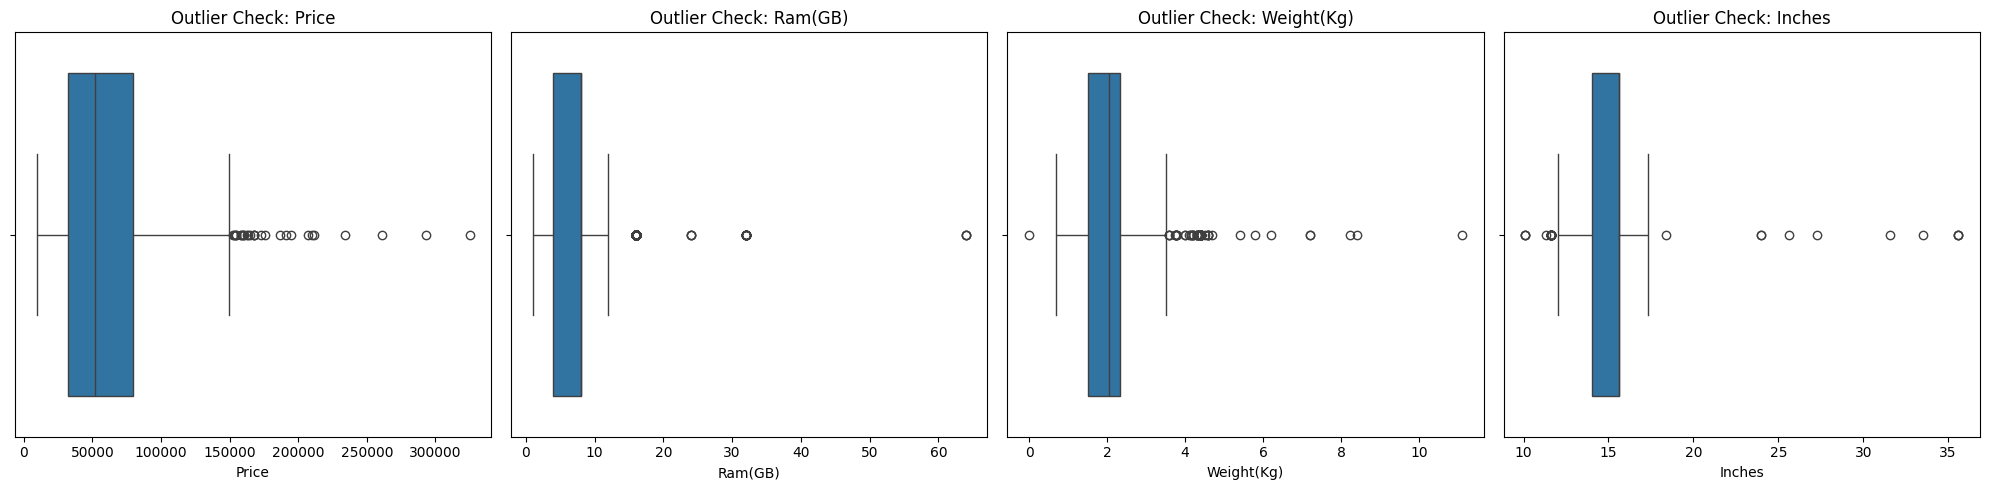

In [17]:
# Visually check for outliers in Numerical Columns
numeric_cols = ['Price', 'Ram(GB)', 'Weight(Kg)', 'Inches']

# Set up subplot grid — 1 row, len(numeric_cols) columns
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(5 * len(numeric_cols), 5))

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Outlier Check: {col}')

plt.tight_layout()
plt.show()

The boxplots reveal several outliers in all numeric features, especially in Price, RAM, and Weight.
These extreme values may impact analysis or modeling, so it's worth considering whether to investigate or remove them.

In [18]:
# winsorization
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower, upper)
    return df

for col in ['Price', 'Ram(GB)', 'Weight(Kg)', 'Inches']:
    df = cap_outliers(df, col)

I used Winsorization as a reliable way to handle extreme values in my data without having to delete any rows. This helped me keep the dataset intact while reducing the impact of outliers on my analysis and model performance.

# **Feature Engineering**

In [19]:
#This code parses the complex 'Memory' column  into separate numeric columns for each type of storage:
def process_memory(mem):
    ssd = hdd = hybrid = flash = 0
    parts = mem.split('+')
    for part in parts:
        part = part.strip()

        # Check if it's TB or GB and convert accordingly
        size = 0
        if 'TB' in part:
            size = float(part.split()[0].replace('TB', '')) * 1000
        else:
            size = float(part.split()[0].replace('GB', ''))

        if 'SSD' in part:
            ssd += int(size)
        elif 'HDD' in part:
            hdd += int(size)
        elif 'Hybrid' in part:
            hybrid += int(size)
        elif 'Flash Storage' in part:
            flash += int(size)

    return pd.Series([ssd, hdd, hybrid, flash])

df[['SSD', 'HDD', 'Hybrid', 'Flash Storage']] = df['Memory'].apply(process_memory)
df.drop(columns='Memory', inplace=True)

I split the complex Memory column into separate columns for SSD, HDD, Hybrid, and Flash Storage to better understand each laptop’s storage setup.
By converting all sizes to GB, I made the data cleaner and easier to work with for analysis.

In [20]:
# splitting the Cpu column into seperate columns
df['Cpu_brand'] = df['Cpu'].str.split().str[0]
df['Cpu_type'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))
df['Cpu_speed'] = df['Cpu'].str.extract(r'([\d.]+)GHz').astype(float)

I extracted Cpu_brand, Cpu_type, and Cpu_speed from the Cpu column to simplify analysis by separating brand, model, and speed into clear, numeric or categorical features.

In [21]:
# splitting the Gpu column into seperate columns
df['Gpu_brand'] = df['Gpu'].str.split().str[0]
df['Gpu_model'] = df['Gpu'].apply(lambda x: ' '.join(x.split()[1:]))

df.drop(columns=['Cpu','Gpu'], axis=1,inplace = True)

I split the Gpu column into Gpu_brand and Gpu_model to separate the manufacturer from the specific graphics model.
After extracting that info, I dropped the original Cpu and Gpu columns to keep the dataset clean.

In [22]:
#Screen Feature Extraction and PPI Calculation
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen').astype(int)
df['Ips'] = df['ScreenResolution'].str.contains('IPS').astype(int)
df['X_res'] = df['ScreenResolution'].str.extract(r'(\d+)x').astype(float)
df['Y_res'] = df['ScreenResolution'].str.extract(r'x(\d+)').astype(float)
df['PPI'] = ((df['X_res']**2 + df['Y_res']**2)**0.5 / df['Inches']).round(2)

df.drop(columns=['ScreenResolution','X_res', 'Y_res'], inplace=True)

I extracted features like Touchscreen, Ips, and screen resolution (X_res, Y_res) from the ScreenResolution column to better understand display quality.
Then I calculated PPI (pixels per inch) for screen sharpness and dropped the intermediate columns to keep things tidy.

<Axes: >

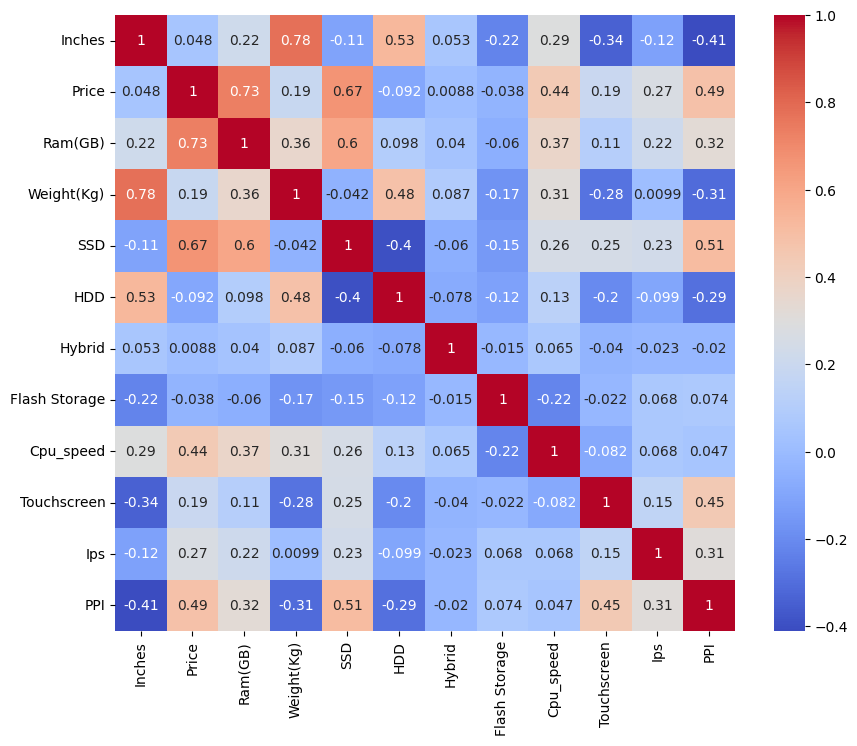

In [23]:
#Heatmap of Numeric Feature Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

Price is most positively correlated with RAM, SSD, PPI, and Touchscreen  confirming that performance and display quality drive up laptop costs.
HDD has a slight negative correlation, indicating it's more common in lower-priced models.
This helps me pinpoint which features actually influence pricing in the market.

In [24]:
# List of categorical columns
cat_cols = ['Company', 'TypeName', 'OpSys','Cpu_brand','SSD','HDD','Inches', 'Cpu_type','Hybrid','Flash Storage', 'Gpu_brand', 'Gpu_model']

# One-hot encode and drop the first category to avoid dummy variable trap
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

I used one-hot encoding the categorical columns like Company, TypeName, and Gpu_brand to convert them into numeric format for modeling.
By setting drop_first=True, I avoided the dummy variable trap and reduced multicollinearity in my dataset.

In [25]:
# Replace target with log-transformed version
y = np.log1p(df['Price'])
X = df.drop('Price', axis=1)

I applied a log transformation to the Price column to handle skewness and make the model more accurate.
Then, I separated Price from the rest of the data so I could use the features (X) to train my model.

# **Splitting Data into Training and Testing**

In [26]:
#Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


I split my dataset into training and testing sets using an 80-20 ratio to evaluate model performance fairly.
Setting random_state=42 ensures the split is reproducible every time I run the code.

In [27]:
#Feature Scaling with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

I used StandardScaler to standardize my feature data so that all columns have a mean of 0 and standard deviation of 1.
This helps improve model performance, especially for algorithms sensitive to feature scale like linear regression or SVM.

# **Model Building and Evaluation**

**Linear Regression**

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

Linear_Reg = LinearRegression()
Linear_Reg.fit(X_train_Scaled,y_train)
y_pred_log = Linear_Reg.predict(X_test_Scaled)

y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)



print("R² Score:", r2_score(y_test_actual, y_pred_actual))
print("MAE:", mean_absolute_error(y_test_actual, y_pred_actual))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)))



R² Score: 0.8395912712111916
MAE: 8636.969804076085
RMSE: 13062.364268345043


I trained a Linear Regression model on the scaled data and predicted laptop prices on the test set.
Since I used a log transformation earlier, I applied expm1() to convert predictions back to actual price values.
Then, I evaluated the model using R² Score, MAE, and RMSE.
  The model explains 83.9% of the price variation, with an average error of around ₹8.6K.
The RMSE of ₹13K suggests predictions are generally close but can deviate more on some laptops.

**Support Vector Regression**

In [29]:
from sklearn.svm import SVR

Support_Reg = SVR()
Support_Reg.fit(X_train_Scaled,y_train)
y_pred_log = Support_Reg.predict(X_test_Scaled)

y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)


print("R² Score:", r2_score(y_test_actual, y_pred_actual))
print("MAE:", mean_absolute_error(y_test_actual, y_pred_actual))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)))



R² Score: 0.8540325022189672
MAE: 8476.109923957532
RMSE: 12460.511598763711


I trained an SVR model to see if it could outperform linear regression in predicting laptop prices. The SVR model performed slightly better than my linear regression model, with an R² of 0.854 — explaining a bit more variance in prices.
It also reduced the average error to about ₹8.4K, and the RMSE dropped slightly to ₹12.4K, showing more consistent predictions overall.


**Random Forest Regressor**

In [30]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_Scaled, y_train)
y_pred_log = rf.predict(X_test_Scaled)

y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

print("R² Score:", r2_score(y_test_actual, y_pred_actual))
print("MAE:", mean_absolute_error(y_test_actual, y_pred_actual))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)))

R² Score: 0.8732963847742385
MAE: 7431.861050256528
RMSE: 11609.200063002821


I trained a Random Forest Regressor to predict laptop prices, hoping for better accuracy through its ensemble learning approach. The Random Forest model gave me the best performance so far, with an R² of 0.873, capturing nearly 87% of price variance.
It also reduced the MAE to ₹7.4K and RMSE to ₹11.6K, making it more accurate and reliable than both linear regression and SVR.

**Gradient Boosting Regressor**

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_Scaled,y_train)
y_pred_log = gb.predict(X_test_Scaled)

y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

print("R² Score:", r2_score(y_test_actual, y_pred_actual))
print("MAE:", mean_absolute_error(y_test_actual, y_pred_actual))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)))

R² Score: 0.8881628573834036
MAE: 7795.819416013308
RMSE: 10906.88724425151


I trained a Gradient Boosting model to capture more complex relationships in the data and improve prediction accuracy. My Gradient Boosting model performed the best overall, explaining 88.8% of the variation in laptop prices with an average error of around ₹7,796 (MAE). Its predictions are fairly accurate, with a typical deviation (RMSE) of about ₹10,907 from actual prices. It is it more accurate and reliable than linear regression and SVR and random forest regressor.

# **Hyperparameter Tuning**

In [32]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}
grid_gb = GridSearchCV(gb, param_grid_gb, cv=3, scoring='r2', n_jobs=-1)
grid_gb.fit(X_train_Scaled, y_train)
best_gb = grid_gb.best_estimator_

y_pred_gb_log = best_gb.predict(X_test_Scaled)
y_pred_gb = np.expm1(y_pred_gb_log)

print("\n Gradient Boosting Results:")
print("Best Params:", grid_gb.best_params_)
print("R²:", r2_score(y_test_actual, y_pred_gb))
print("MAE:", mean_absolute_error(y_test_actual, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_gb)))


 Gradient Boosting Results:
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
R²: 0.8850149064674652
MAE: 7157.4741182139505
RMSE: 11059.323541010186


I fine-tuned my Gradient Boosting model using GridSearchCV to find the best combination of parameters that give the most accurate laptop price predictions. After training on the scaled data, I transformed the predictions back from log scale to actual prices. After tuning my Gradient Boosting model, I achieved an R² of 88.5%, showing strong predictive power on unseen data. The MAE of around ₹7,157 means my predictions are fairly close to actual prices. With an RMSE near ₹11,059, the model balances bias and variance well making it reliable for real-world laptop price estimation.

# **Actual vs Predicted Laptop Prices Using Scatter Plot**

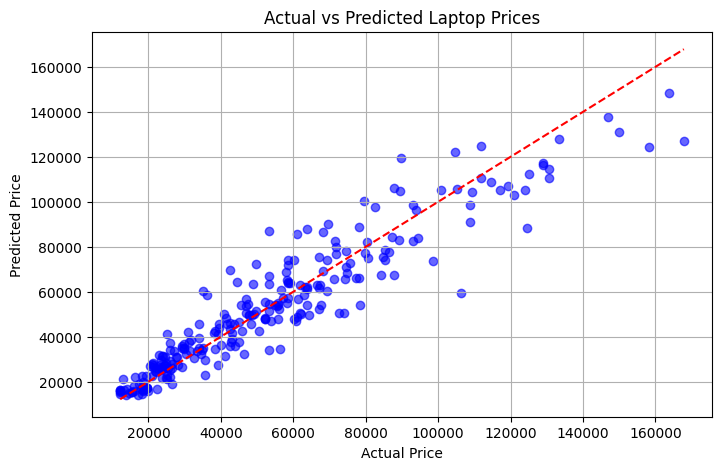

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(y_test_actual, y_pred_actual, color='blue', alpha=0.6)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.grid(True)
plt.show()

This scatter plot compares actual vs. predicted laptop prices. Points near the red dashed line indicate accurate predictions by the model.

# **Saving My Trained Model**

In [33]:
import joblib

# Save the best model and scaler
joblib.dump(grid_gb,"GradientBoost_Model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

I saved my trained Gradient Boosting model, the scaler, and the feature columns using joblib so I won’t have to retrain everything from scratch. Now, I can load them anytime and instantly predict laptop prices with the same setup I carefully built.

# **Prediction for New Laptops**

In [34]:
# Load model, scaler, and training column names
model = joblib.load("GradientBoost_Model.pkl")
scaler = joblib.load("scaler.pkl")
feature_columns = joblib.load("feature_columns.pkl")

def predict_price(new_data):
    # Convert to DataFrame
    df = pd.DataFrame([new_data])

    # One-hot encode
    df_encoded = pd.get_dummies(df)

    # Align with training columns
    df_encoded = df_encoded.reindex(columns=feature_columns, fill_value=0)

    # Scale
    df_scaled = scaler.transform(df_encoded)

    # Predict and inverse log transform
    log_price = model.predict(df_scaled)
    actual_price = np.expm1(log_price)

    return round(actual_price[0], 2)

This function allows me to predict the price of any new laptop configuration using my saved Gradient Boosting model. It preprocesses the input, aligns it with the training data, scales it, and returns the final predicted price after reversing the log transformation.

In [35]:
new_laptop = {
    'Company': 'Dell',
    'TypeName': 'Notebook',
    'Inches': 15.6,
    'Ram(GB)': 8,
    'Weight(Kg)': 1.8,
    'Touchscreen': 0,
    'Ips': 0,
    'PPI': 141.21,
    'Cpu_brand': 'Intel',
    'Cpu_speed': '1.8',
    'HDD': 0,
    'SSD': 256,
    'Gpu_brand': 'AMD',
    'Gpu_Model': 'Radeon R5 M430',
    'OpSys': 'Windows 10'
}

# Run prediction
predicted_price = predict_price(new_laptop)
print(f"Predicted Laptop Price: ₹{predicted_price}")


Predicted Laptop Price: ₹39130.66


In [36]:
new_laptop = {
    'Company': 'Apple',
    'TypeName': 'Ultrabook',
    'Inches': 13.6,
    'Ram(GB)': 16,
    'Weight': 1.24,
    'Touchscreen': 0,
    'Ips': 1,
    'PPI': 224.0,
    'Cpu_brand': 'Apple',
    'Cpu_speed': 3.2,
    'HDD': 0,
    'SSD': 512,
    'Gpu_brand': 'Apple',
    'Gpu_Model': 'M2 GPU',
    'OpSys': 'macOS'
}
predicted_price = predict_price(new_laptop)
print(f"Predicted Laptop Price: ₹{predicted_price}")

Predicted Laptop Price: ₹113173.54


In [39]:
new_laptop = {
    'Company': 'Acer',
    'TypeName': 'Ultrabook',
    'Inches': 15.6,
    'RAM': 8,
    'Weight': 1.8,
    'Touchscreen': 0,
    'IPS': 1,
    'PPI': 141.2,  # For Full HD (1920x1080) on 15.6"
    'Cpu_brand': 'Intel',
    'Cpu_speed': 2.4,  # e.g., Intel i5 11th Gen
    'HDD': 0,
    'SSD': 512,
    'Gpu_brand': 'Nvidia',
    'Gpu_Model': 'GTX 1650',
    'OpSys': 'Windows 11'
}
predicted_price = predict_price(new_laptop)
print(f"Predicted Laptop Price: ₹{predicted_price}")

Predicted Laptop Price: ₹42277.68


My model demonstrates strong predictive performance across laptops from various companies, including both well-known and lesser-known brands.

# **Conclusion:**
In this project, we developed a machine learning pipeline to predict laptop prices using key specifications like brand, processor, GPU, storage, and display features. After performing data preprocessing, feature engineering, encoding, scaling, and outlier treatment, we trained and evaluated several regression models. Among these, Gradient Boosting Regressor initially gave the best R² score. Based on this result, we selected it for hyperparameter tuning, which further improved its performance. The final model achieved an R² score of 88.8%, demonstrating strong predictive capability for real-time laptop price estimation.
